In [192]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import re

In [193]:
#adding url to variable
wiki_url = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")

In [194]:
#reading url for html data
data = wiki_url.read()
print(data)

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by GDP (nominal) - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-

In [195]:
#read the page using bs4
fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding='utf8')
soup = BeautifulSoup(fd)
fd.close()


In [196]:
#how many tables are there?
tables = soup.findAll("table")
print(len(tables))

9


In [197]:
print(tables)

[<table border="0" cellpadding="2" cellspacing="0" style="float:right;">
<tbody><tr>
<td><div class="timeline-wrapper"><map name="timeline_45cabf722ffec5de02631bda1f6ccce0"></map><img src="./List of countries by GDP (nominal) - Wikipedia_files/45cabf722ffec5de02631bda1f6ccce0.png" usemap="#timeline_45cabf722ffec5de02631bda1f6ccce0"/></div>
</td></tr>
<tr>
<td style="text-align:center; font-size:100%;">Largest economies by nominal GDP in 2017<sup class="reference" id="cite_ref-GDP_IMF_1-0"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">[1]</a></sup>
</td></tr></tbody></table>, <table class='"wikitable"|}' style="margin:auto; width:100%;">
<tbody><tr>
<td style="width:33%; text-align:center;"><b>Per the <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a> (2017)</b><sup class="reference" id="cite_ref-GDP_IMF_1-2"><a href="https://en.wikipedia.org/wiki/List_of

In [198]:
#find the right table using bs4
right_table = soup.find("table", {"class": "wikitable"})
print(len(right_table))

4


In [199]:
print(type(right_table))

<class 'bs4.element.Tag'>


In [200]:
#separate source names and actual data
sources = right_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))
     

3


In [201]:
#second way to do the same problem shown from book
data = right_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [202]:
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))
    
len(data_tables)

3

In [80]:
#source names listed out
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)


IndexError: list index out of range

In [89]:
#tried it this way as well
source_names = findAll("a" ,sources_list).getText()
print(source_names)

NameError: name 'findAll' is not defined

In [86]:
#another attempt
source_names = [source.findAll('a')[0].getText() for source in sources_list]
for i in range(len(source_names)):
    print(source_names[i])

IndexError: list index out of range

In [102]:
#another attemp
source_names = [soup.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['', '', '']


In [207]:
#at least I got something to print on this attempt
source_names = sources.find("table", {"title": '"wikitable"|}'})
print(sources_list)

[<td data-sort-value="-1"> </td>, <td data-sort-value=""><span class="flagicon" style="padding-left:25px;"> </span><i><a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a></i><sup class="reference" id="cite_ref-IMF_Groups_19-1"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-IMF_Groups-19">[19]</a></sup></td>, <td align="right">79,865,481
</td>]


In [208]:
#this way is a little less code but still not what we're looking for
source_names = sources.findAll('a')
print(source_names)

[<a href="https://en.wikipedia.org/wiki/Gross_world_product" title="Gross world product">World</a>, <a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-IMF_Groups-19">[19]</a>]


In [209]:
#same error as the code above that I got 
#could not get the next few pieces to code to work at all because of this. 
#I continued to try and do this for the rest of the code for activity 7. 
#could not get any advice to work on the chats and also tagged you in the chats since you said that was a better way to 
#contact you. 
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

IndexError: list index out of range

In [105]:
#could not get this code to work either
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

AttributeError: 'list' object has no attribute 'findAll'

In [104]:
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

NameError: name 'rows1' is not defined

In [57]:
df1 = pd.DataFrame(data_rows1, columns=header1)

NameError: name 'data_rows1' is not defined

In [58]:
df1.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [59]:

header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

IndexError: list index out of range

In [60]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

IndexError: list index out of range

In [61]:
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3


IndexError: list index out of range

In [62]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()


IndexError: list index out of range

In [63]:
#read the visit data csv
df=pd.read_csv("visit_data.csv")

In [64]:
#check for duplicates
for c in df.columns:
    #finding duplicate values
    dup = any(df[c].duplicated())
    
    if dup == True:
        print(" {} has duplicate value(s)".format(c)) 
    else: 
        print("{} has NO  duplicate values!".format(c))

id has NO  duplicate values!
 first_name has duplicate value(s)
 last_name has duplicate value(s)
email has NO  duplicate values!
 gender has duplicate value(s)
ip_address has NO  duplicate values!
 visit has duplicate value(s)


In [65]:
#check if any essential column contains NaN
for c in df.columns:
    #finding NaN values
    nan = df[c].isnull().values.any()
    #printing out 
    if nan == True:
        print(" {} has Nan value(s)".format(c)) 
    else: 
        print("{} has NO Nan values!".format(c))

id has NO Nan values!
 first_name has Nan value(s)
 last_name has Nan value(s)
email has NO Nan values!
 gender has Nan value(s)
ip_address has NO Nan values!
 visit has Nan value(s)


In [106]:
#get rid of outliers
size_prev = df.shape
df = df[np.isfinite(df['visit'])] 
size_after = df.shape

In [107]:
#report the size difference
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 974 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x2060b1703a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2060b1708e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2060b170100>],
 'medians': [<matplotlib.lines.Line2D at 0x2060b170e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2060b93b100>],
 'means': []}

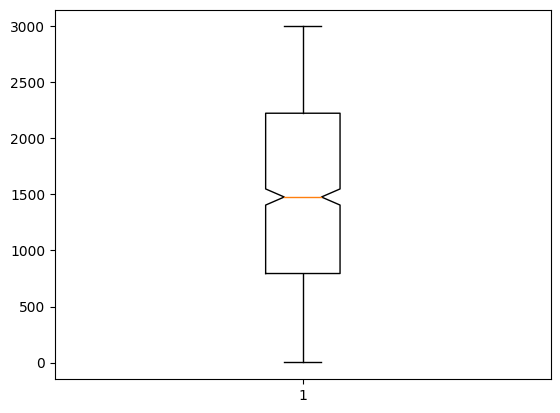

In [68]:
#create a box plot to check for outliers
#looks like we look at where the line is and pick a number below that to remove those integars
plt.boxplot(df.visit, notch=True)

In [69]:
#get rid of any outliers

In [110]:
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)] 

In [111]:
print("The new size of the data is - {}".format(*df1.shape))

The new size of the data is - 923


In [115]:
from flask import flash
from mysqlconnection import connectToMySQL
import MySQLdb
import sqlite3

In [113]:
#attempted to connect to MYSQL like how I do in vscode with python  but this seemed to fail. I still want to keep the code
#so that I can try this again in the future
class Info:
    db = "week_6"

    def __init__(self, data):
        self.id = data['id']
        self.name=data['name']
        self.address=data['address']
        self.city=data['city']
        self.state=data['state']
        self.zip = data['zip']
        self.phone = data['phone']
    
    @classmethod
    def save(cls, data):
        query = 'INSERT INTO user (name, address, city, state, zip, phone) VALUES (%(name)s,%(address)s,%(city)s,%(state)s,%(zip)s,%(phone)s);'
        return connectToMySQL(cls.db).query_db(query, data)

In [114]:
#part of failed code
%sql

INSERT INTO user(name, address, city, state, zip, phone)
VALUES("abc", "falcon", "seatte", "WA", "98003", "1234567890")

SyntaxError: invalid syntax (601452709.py, line 3)

In [175]:
#create a table with query

query = """
CREATE TABLE people
(name VARCHAR(20), address VARCHAR(20), city VARCHAR(20), state VARCHAR(20), zip VARCHAR(5), phone TEXT
);"""

In [176]:
#connect to sqlite
con = sqlite3.connect("mydata.sqlite")

In [177]:
#excecuting the query to create a new table
con.execute(query)

In [178]:
#saving
con.commit()

In [179]:
#data to insert into new table
data = [("Eric", "36565 31st ave S", "Federal Way", "Wa", 98003, 5551234567), 
        ("Suzy", "789 Roehampton St.", "Farmington", "MI", 48331, 5557392830),
        ("James", "447 Ketch Harbour St.", "Allentown", "PA", 18102, 5550283495),
        ("Mike", "399 Manor Road", "Griffin", "GA", 30223, 5550987654),
        ("Roland", "541 Rockland Ave.", "Melbourne", "Fl", 32904, 5553450987),
        ("Bethany", "8090 State St.", "Herndon", "VA", 20170, 5551237895),
        ("Luke", "850 Elm St.", "Wheaton", "IL", 68307, 5559834672),
        ("Emily", "44 Roehampton Street", "Hoffman Estates", "IL", 60169, 5559384756),
        ("Eugene", "73 Smith Store Drive", "New City", "NY", 10956, 5559384756),
        ("Ivonne", "348 Briarwood Street", "Raeford", "NC", 28376, 5555437895),
       ]

In [180]:
#new query to insert data
stmt = "INSERT INTO people VALUES (?,?,?,?,?,?)"

In [181]:
#running code to insert data into table
con.executemany(stmt,data)

In [182]:
#save
con.commit()

In [183]:
#variable with a query to pull all data from table
cursor = con.execute("SELECT * FROM people")

In [184]:

rows = cursor.fetchall()

In [185]:
#running code to print all data from tables!
rows

[('Eric', '36565 31st ave S', 'Federal Way', 'Wa', '98003', '5551234567'),
 ('Suzy', '789 Roehampton St.', 'Farmington', 'MI', '48331', '5557392830'),
 ('James', '447 Ketch Harbour St.', 'Allentown', 'PA', '18102', '5550283495'),
 ('Mike', '399 Manor Road', 'Griffin', 'GA', '30223', '5550987654'),
 ('Roland', '541 Rockland Ave.', 'Melbourne', 'Fl', '32904', '5553450987'),
 ('Bethany', '8090 State St.', 'Herndon', 'VA', '20170', '5551237895'),
 ('Luke', '850 Elm St.', 'Wheaton', 'IL', '68307', '5559834672'),
 ('Emily',
  '44 Roehampton Street',
  'Hoffman Estates',
  'IL',
  '60169',
  '5559384756'),
 ('Eugene', '73 Smith Store Drive', 'New City', 'NY', '10956', '5559384756'),
 ('Ivonne', '348 Briarwood Street', 'Raeford', 'NC', '28376', '5555437895')]